# Import Libraries

In [153]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from matplotlib import pyplot as plt
from pandasql import sqldf
from sklearn import datasets
import seaborn as sns
%matplotlib inline

# Data Exploration

In [154]:
bank_df = pd.read_csv('/Users/reemaalotaibi/Documents/DSIS/Group Project/Data Sets/bank-additional/bank-additional-full.csv')
bank_df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


The data set is separated by a customer delimiter -;-
it can be removed from the file itself by ctrl + h then replace
or by using the parameter sep

In [155]:
bank_df = pd.read_csv('/Users/reemaalotaibi/Documents/DSIS/Group Project/Data Sets/bank-additional/bank-additional-full.csv' ,sep=';')
#displays all columns in the dataset
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [156]:
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values, however I see 'unknown' and 'nonexistent' values

In [157]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [158]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

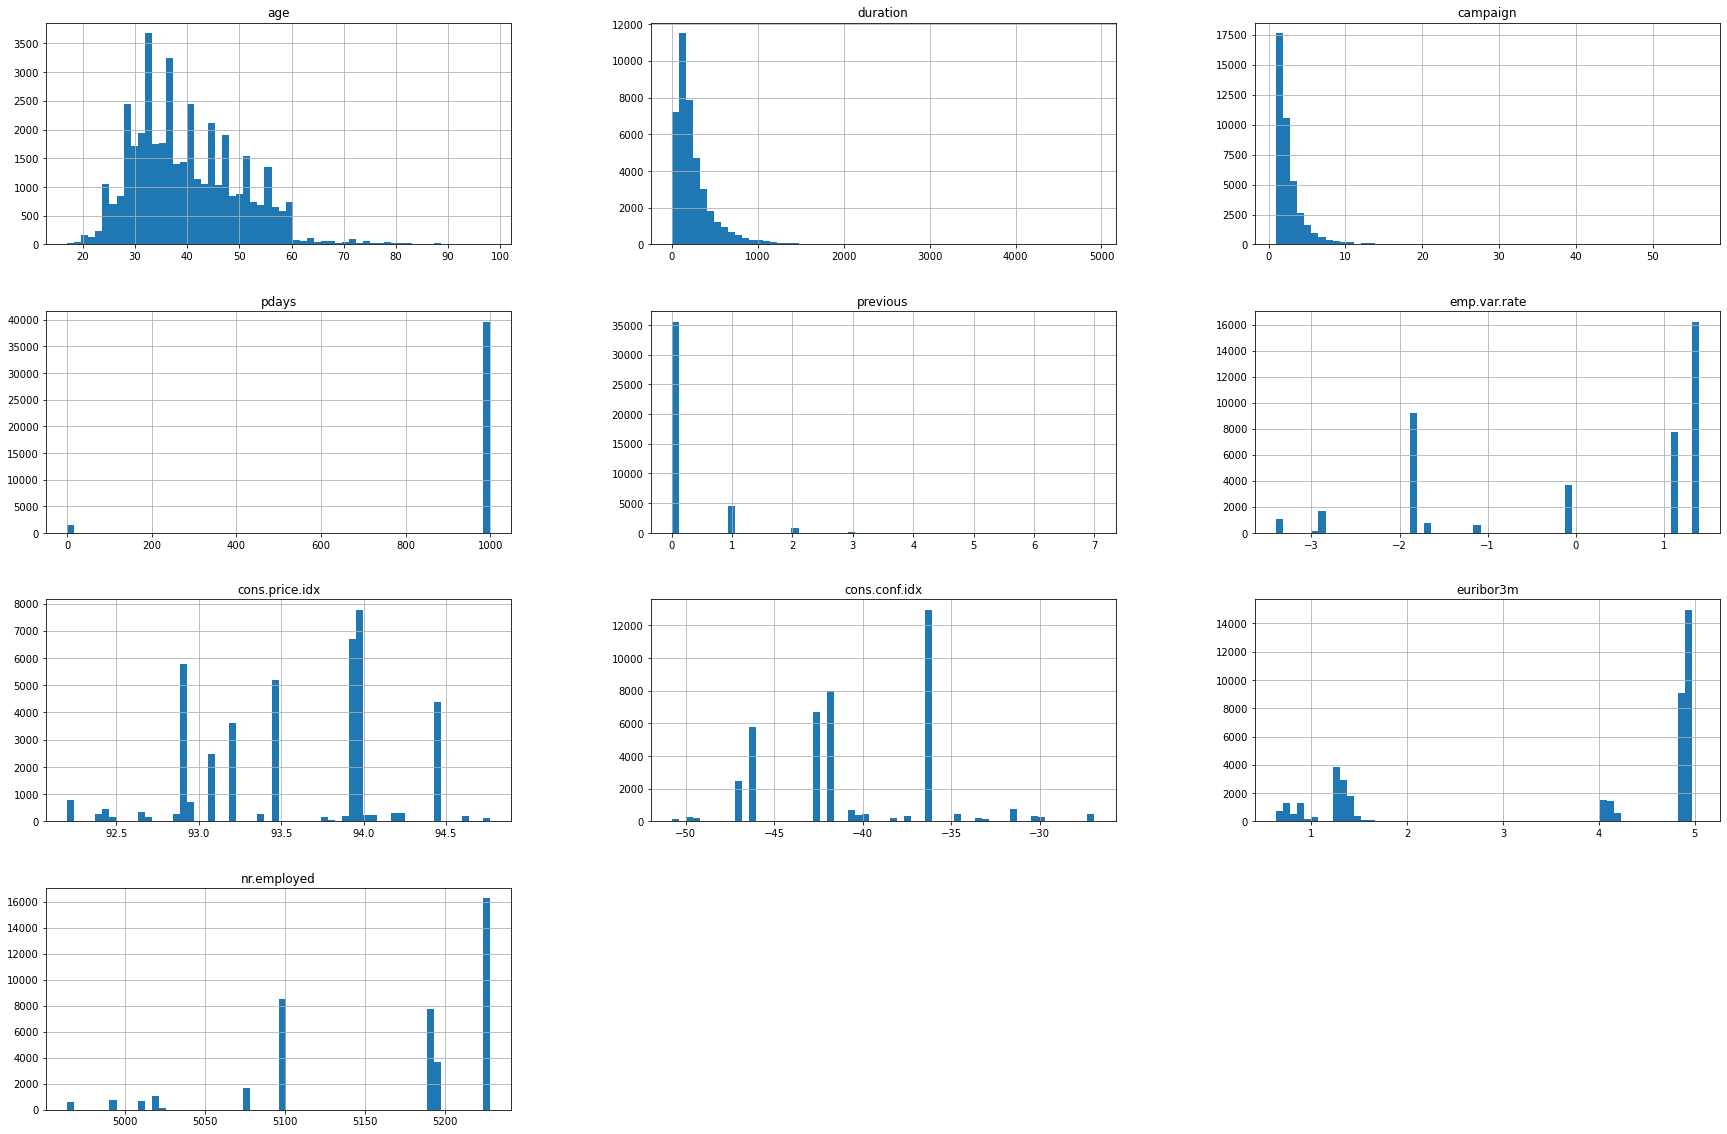

In [159]:
bank_df.hist(bins=60, figsize=(30,20))

In [160]:
prev_zero = bank_df[bank_df['previous'] == 0]

In [161]:
prev_zero['poutcome'].unique()

array(['nonexistent'], dtype=object)

In [162]:
prev_one = bank_df[bank_df['previous'] > 0]

In [163]:
prev_one['poutcome'].unique()

array(['failure', 'success'], dtype=object)

when there's no contact between the client and the bank, obviously no outcome results

In [164]:
#bank_df[bank_df['columnname'].isna()]

In [165]:
bank_default = bank_df.loc[(bank_df['housing'] == 'no') & (bank_df['loan'] == 'no') & (bank_df['contact'] == 'telephone')]

In [166]:
bank_default

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,29,technician,single,university.degree,no,no,no,telephone,nov,mon,360,1,3,2,success,-1.1,94.767,-50.8,1.050,4963.6,yes
41082,48,admin.,married,high.school,no,no,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no
41129,61,admin.,married,high.school,no,no,no,telephone,nov,wed,508,4,999,0,nonexistent,-1.1,94.767,-50.8,1.044,4963.6,no
41155,31,housemaid,single,university.degree,no,no,no,telephone,nov,mon,152,5,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no


In [167]:
bank_default['default'].unique()

array(['no', 'unknown'], dtype=object)

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


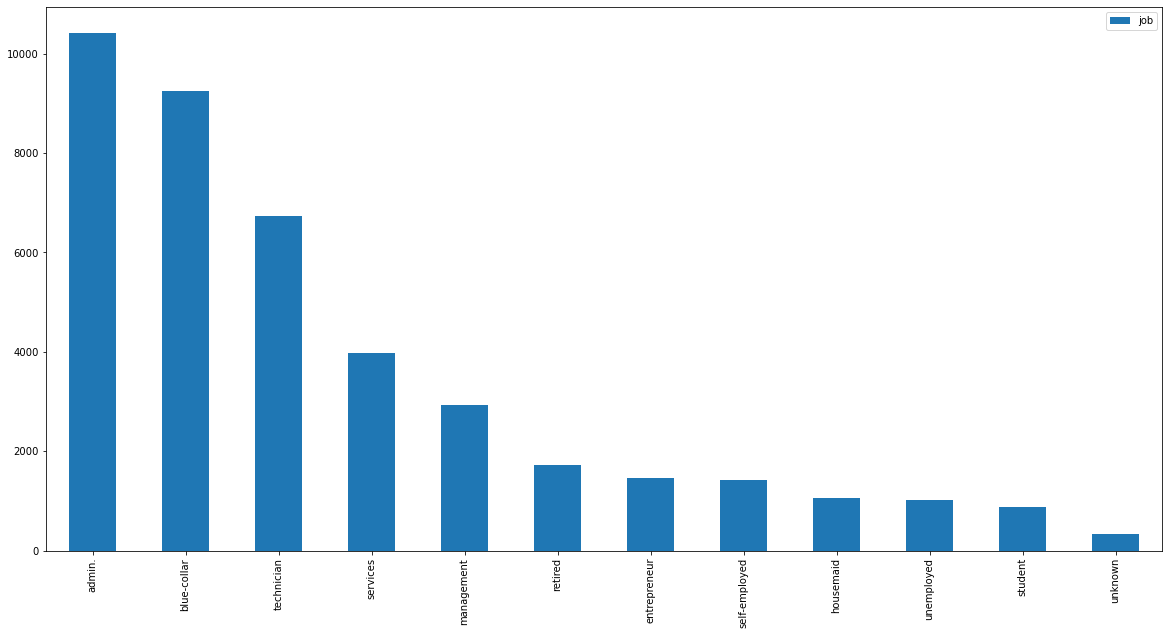

In [168]:
pd.DataFrame(bank_df['job'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(bank_df['job'].value_counts())

,marital
married,24928
single,11568
divorced,4612
unknown,80


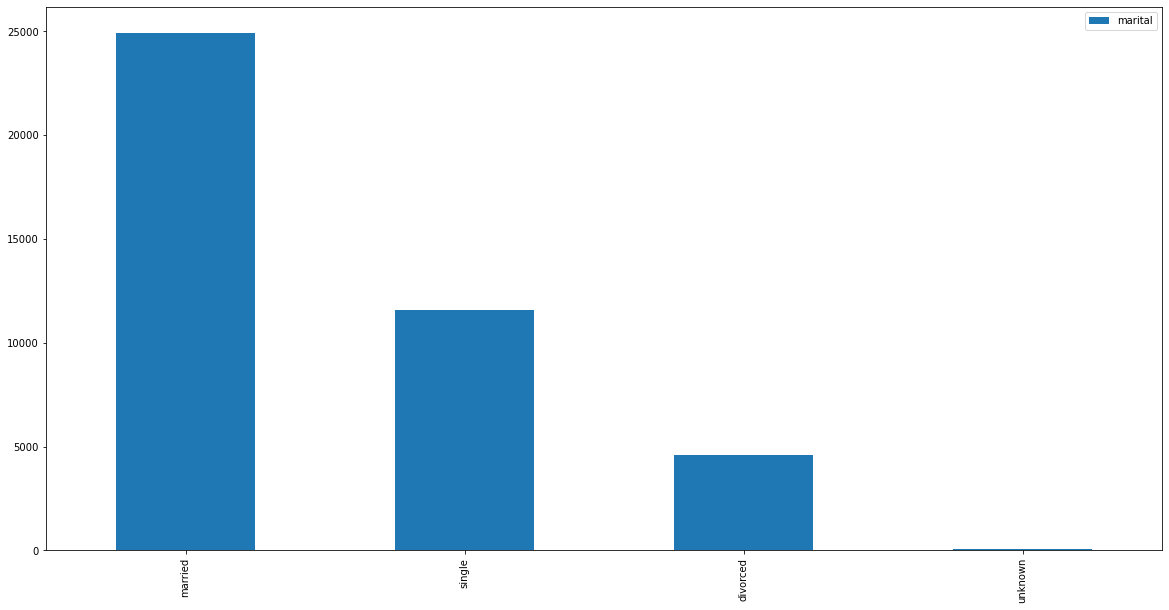

In [169]:
pd.DataFrame(bank_df['marital'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(bank_df['marital'].value_counts())

,education
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


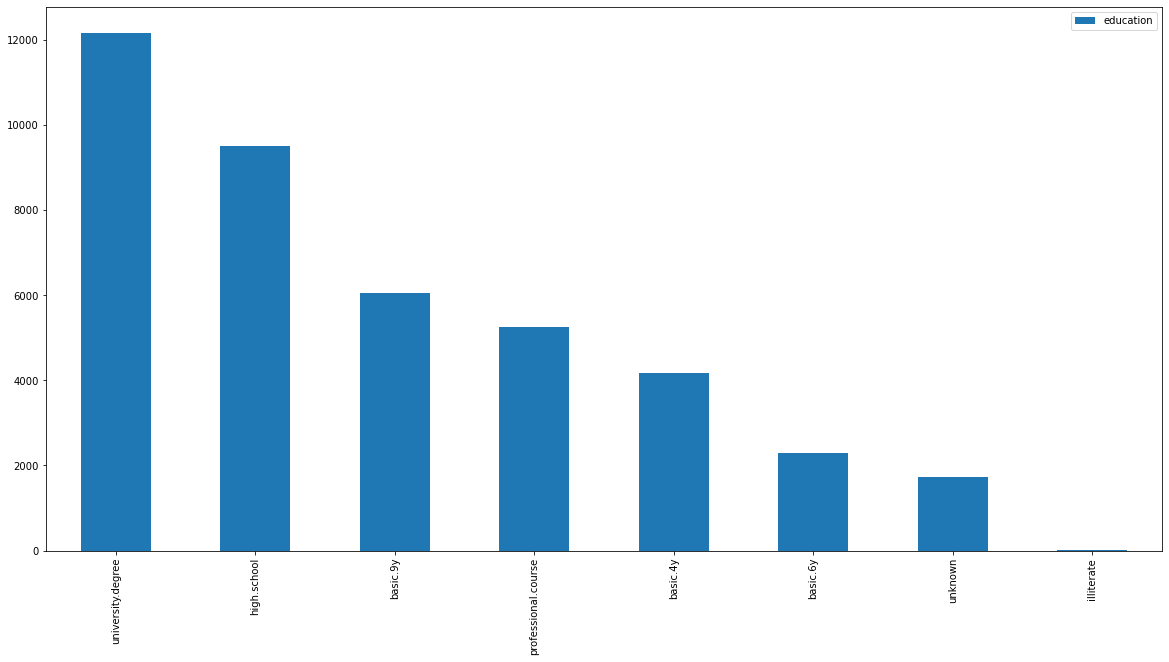

In [170]:
pd.DataFrame(bank_df['education'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(bank_df['education'].value_counts())

In [171]:
nan_bank_df = bank_df

In [172]:
nan_bank_df['default'].replace('unknown', np.nan, inplace = True)

In [173]:
nan_bank_df['loan'].replace('unknown', np.nan, inplace = True)

In [174]:
nan_bank_df['housing'].replace('unknown', np.nan, inplace = True)

In [175]:
nan_bank_df['education'].replace('unknown', np.nan, inplace = True)

In [176]:
nan_bank_df['job'].replace('unknown', np.nan, inplace = True)

In [177]:
nan_bank_df['marital'].replace('unknown', np.nan, inplace = True)

In [178]:
nan_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [179]:
nan_bank_df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [180]:
new_bank_df = nan_bank_df.sort_values(by='age', ascending=True)

In [181]:
new_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,NaN,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,no,NaN,NaN,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37140,17,student,single,NaN,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,92,retired,married,NaN,no,no,yes,cellular,aug,tue,1064,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,134,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,85,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no
38455,98,retired,married,basic.4y,NaN,yes,no,cellular,oct,fri,272,2,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes


In [182]:
new_bank_df['job'].unique()

array(['student', 'technician', 'services', 'entrepreneur', 'blue-collar',
       'admin.', 'unemployed', 'management', 'self-employed', 'housemaid',
       'retired', nan], dtype=object)

In [183]:
job_marital = pd.DataFrame()

job_marital['student'] = new_bank_df[new_bank_df['job'] == 'student']['marital'].value_counts()
job_marital['housemaid'] = new_bank_df[new_bank_df['job'] == 'housemaid']['marital'].value_counts()
job_marital['services'] = new_bank_df[new_bank_df['job'] == 'services']['marital'].value_counts()
job_marital['admin.'] = new_bank_df[new_bank_df['job'] == 'admin.']['marital'].value_counts()
job_marital['blue-collar'] = new_bank_df[new_bank_df['job'] == 'blue-collar']['marital'].value_counts()
job_marital['technician'] = new_bank_df[new_bank_df['job'] == 'technician']['marital'].value_counts()
job_marital['retired'] = new_bank_df[new_bank_df['job'] == 'retired']['marital'].value_counts()
job_marital['management'] = new_bank_df[new_bank_df['job'] == 'management']['marital'].value_counts()
job_marital['unemployed'] = new_bank_df[new_bank_df['job'] == 'unemployed']['marital'].value_counts()
job_marital['self-employed'] = new_bank_df[new_bank_df['job'] == 'self-employed']['marital'].value_counts()
job_marital['entrepreneur'] = new_bank_df[new_bank_df['job'] == 'entrepreneur']['marital'].value_counts()
job_marital['nan'] = new_bank_df[new_bank_df['job'] == 'nan']['marital'].value_counts()

In [184]:
job_marital

,student,housemaid,services,admin.,blue-collar,technician,retired,management,unemployed,self-employed,entrepreneur,nan
single,824,119,1137,3875,1825,2287,93,501,251,379,203,NaN
married,41,777,2294,5253,6687,3670,1274,2089,634,904,1071,NaN
divorced,9,161,532,1280,728,774,348,331,124,133,179,NaN


In [185]:
new_bank_df['marital'].unique()

array(['single', 'married', 'divorced', nan], dtype=object)

In [186]:
age_marital = pd.DataFrame()

age_marital['married'] = new_bank_df[new_bank_df['marital'] == 'married']['age'].value_counts()
age_marital['single'] = new_bank_df[new_bank_df['marital'] == 'single']['age'].value_counts()
age_marital['divorced'] = new_bank_df[new_bank_df['marital'] == 'divorced']['age'].value_counts()
age_marital['nan'] = new_bank_df[new_bank_df['marital'] == 'nan']['age'].value_counts()

In [187]:
age_marital.sort_index()

,married,single,divorced,nan
20,1,64.0,NaN,NaN
21,8,94.0,NaN,NaN
22,16,121.0,NaN,NaN
23,30,196.0,NaN,NaN
24,78,381.0,4.0,NaN
...,...,...,...,...
88,4,NaN,18.0,NaN
91,2,NaN,NaN,NaN
92,3,NaN,1.0,NaN
94,1,NaN,NaN,NaN


In [188]:
new_bank_df['education'].unique()

array([nan, 'basic.9y', 'high.school', 'basic.6y', 'basic.4y',
       'university.degree', 'professional.course', 'illiterate'],
      dtype=object)

In [189]:
age_education = pd.DataFrame()

age_education['basic.9y'] = new_bank_df[new_bank_df['education'] == 'basic.9y']['age'].value_counts()
age_education['high.school'] = new_bank_df[new_bank_df['education'] == 'high.school']['age'].value_counts()
age_education['basic.6y'] = new_bank_df[new_bank_df['education'] == 'basic.6y']['age'].value_counts()
age_education['basic.4y'] = new_bank_df[new_bank_df['education'] == 'basic.4y']['age'].value_counts()
age_education['university.degree'] = new_bank_df[new_bank_df['education'] == 'university.degree']['age'].value_counts()
age_education['professional.course'] = new_bank_df[new_bank_df['education'] == 'professional.course']['age'].value_counts()
age_education['illiterate'] = new_bank_df[new_bank_df['education'] == 'illiterate']['age'].value_counts()
age_education['nan'] = new_bank_df[new_bank_df['education'] == 'nan']['age'].value_counts()

In [190]:
age_education.sort_index()

,basic.9y,high.school,basic.6y,basic.4y,university.degree,professional.course,illiterate,nan
17,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,4,5.0,2.0,4.0,NaN,NaN,NaN,NaN
19,14,4.0,4.0,3.0,NaN,NaN,NaN,NaN
20,6,33.0,NaN,7.0,2.0,2.0,NaN,NaN
21,24,52.0,NaN,2.0,8.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...
81,1,2.0,1.0,10.0,1.0,2.0,NaN,NaN
83,2,2.0,NaN,8.0,2.0,1.0,NaN,NaN
84,1,1.0,NaN,4.0,NaN,NaN,NaN,NaN
86,1,NaN,NaN,4.0,NaN,1.0,NaN,NaN


set education based on age

<AxesSubplot:title={'center':'Age VS Education'}>

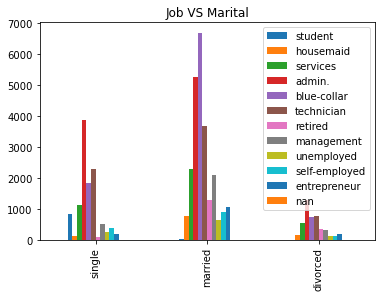

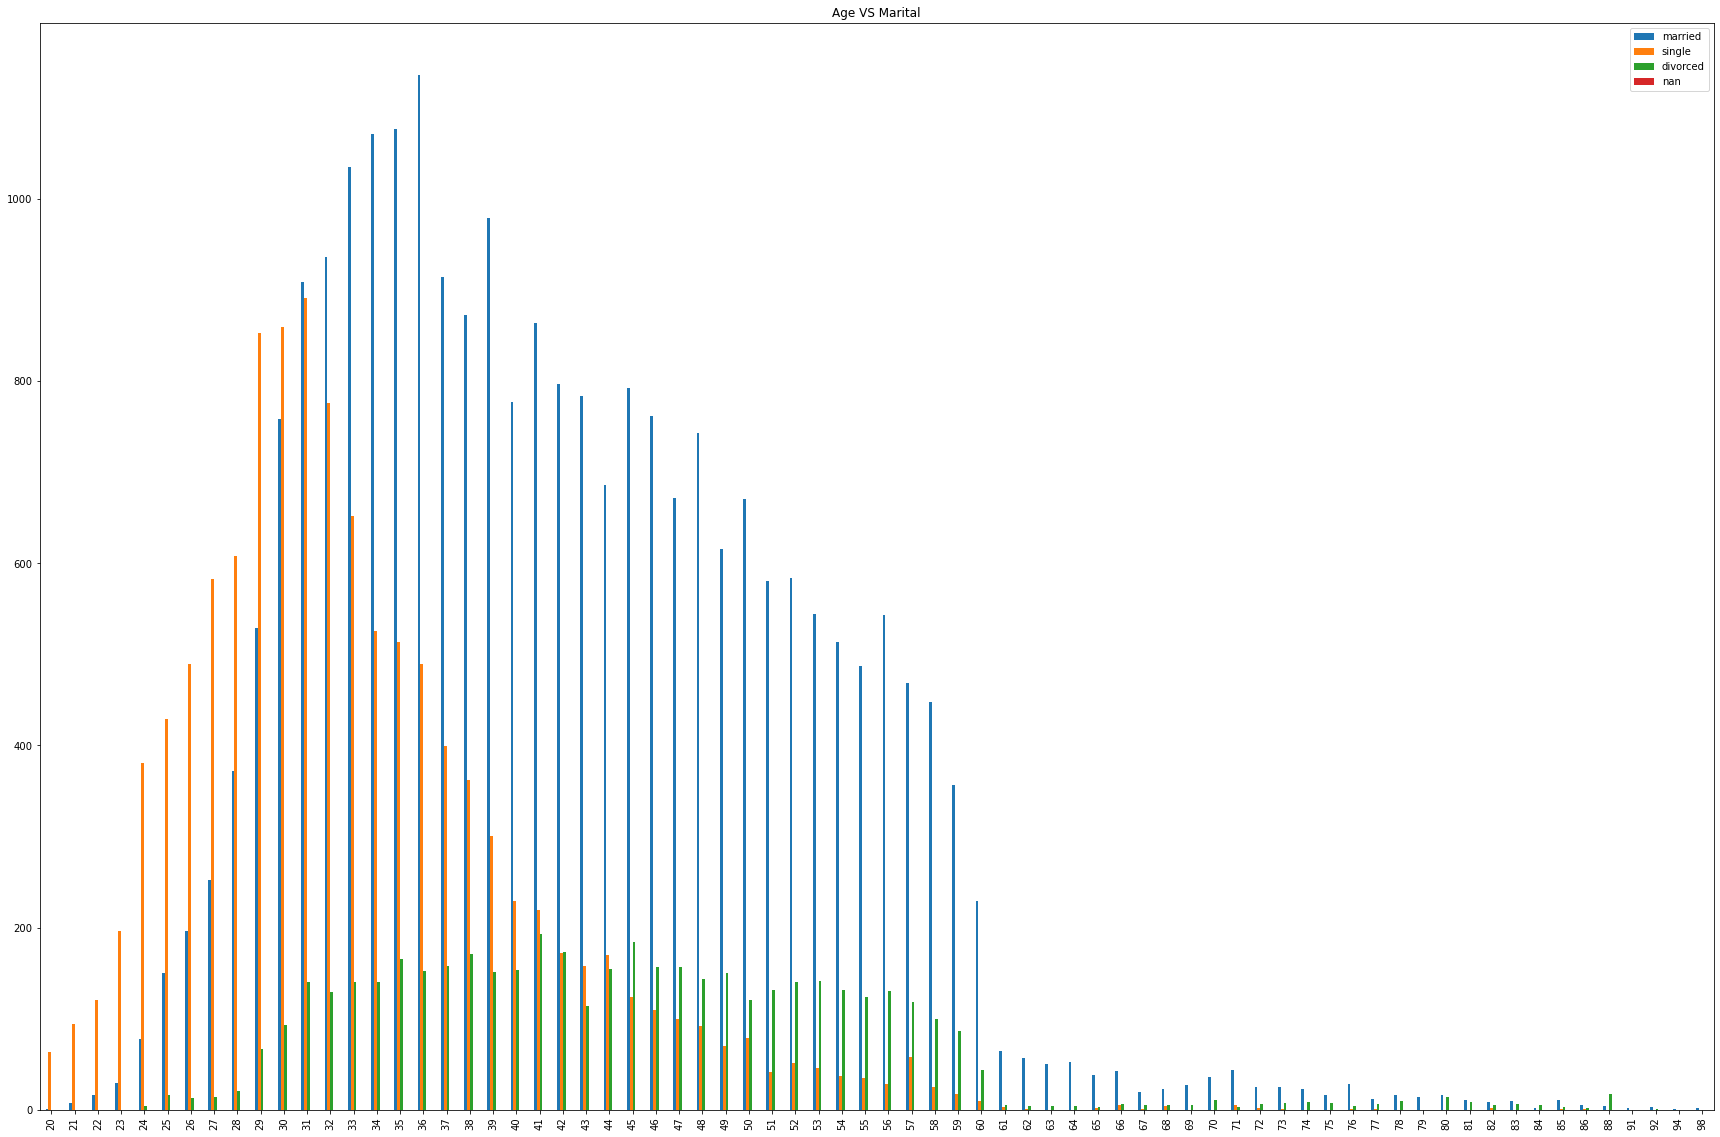

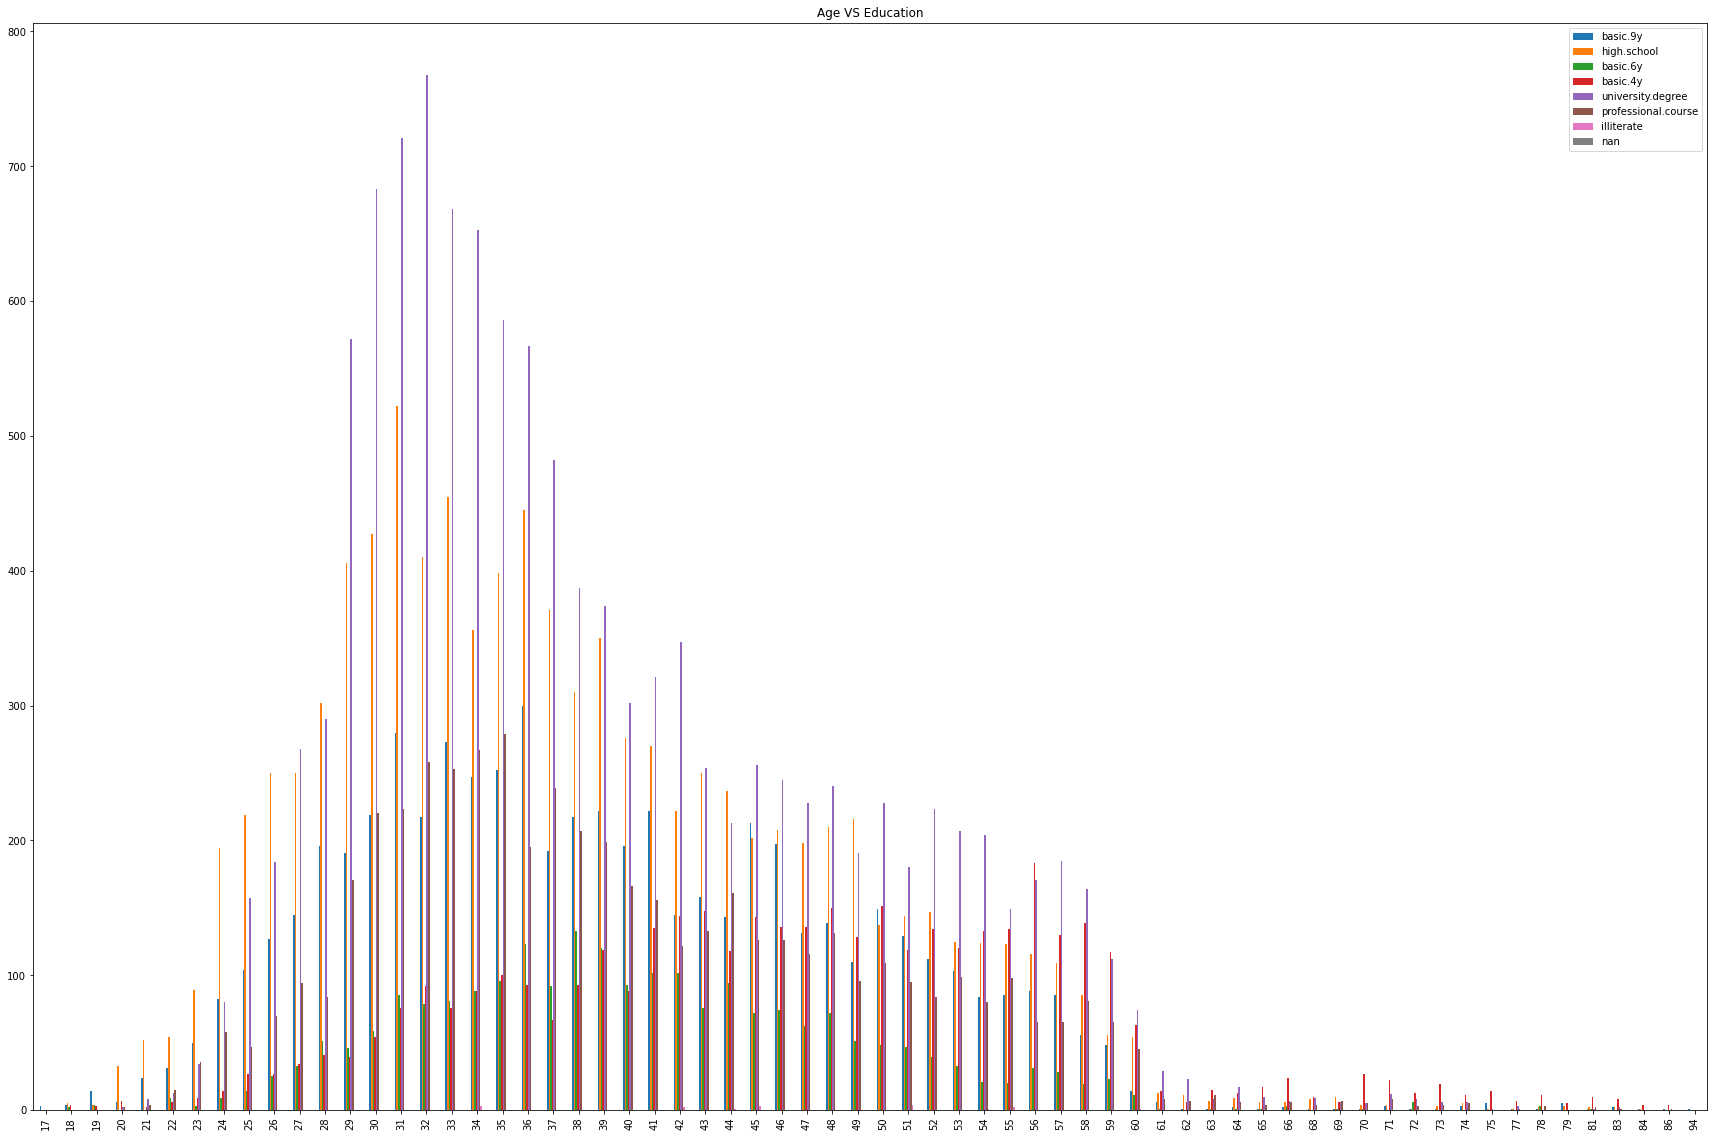

In [191]:
job_marital.plot.bar(title = "Job VS Marital")
age_marital.sort_index().plot.bar(title = 'Age VS Marital', figsize = (30,20))
age_education.sort_index().plot.bar(title = 'Age VS Education', figsize = (30,20))

age < 31 are mostly single. from 31 till 86 are mostly married. at the age of 88 they are mostly divorced.

# Data Preprocessing

In [192]:
new_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,NaN,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,no,NaN,NaN,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37140,17,student,single,NaN,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,92,retired,married,NaN,no,no,yes,cellular,aug,tue,1064,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,134,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,85,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no
38455,98,retired,married,basic.4y,NaN,yes,no,cellular,oct,fri,272,2,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes


In [193]:
new_bank_df['default'] = new_bank_df['default'].replace({'yes': 1, 'no': 0})

In [194]:
new_bank_df['housing'] = new_bank_df['housing'].replace({'yes': 1, 'no': 0})

In [195]:
new_bank_df['loan'] = new_bank_df['loan'].replace({'yes': 1, 'no': 0})

In [196]:
new_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,NaN,0.0,0.0,1.0,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,0.0,NaN,NaN,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37539,17,student,single,basic.9y,0.0,1.0,0.0,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37140,17,student,single,NaN,0.0,1.0,0.0,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37558,17,student,single,basic.9y,0.0,1.0,0.0,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,92,retired,married,NaN,0.0,0.0,1.0,cellular,aug,tue,1064,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
38921,94,retired,married,basic.9y,0.0,0.0,0.0,cellular,nov,wed,134,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
27826,95,retired,divorced,basic.6y,0.0,0.0,0.0,cellular,mar,thu,85,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no
38455,98,retired,married,basic.4y,NaN,1.0,0.0,cellular,oct,fri,272,2,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes


In [197]:
new_bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [198]:
new_bank_df['default'] = new_bank_df['default'].astype('Int64')

In [199]:
new_bank_df['housing'] = new_bank_df['housing'].astype('Int64')

In [200]:
new_bank_df['loan'] = new_bank_df['loan'].astype('Int64')

In [201]:
new_bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,NaN,0,0,1,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,0,<NA>,<NA>,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37539,17,student,single,basic.9y,0,1,0,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37140,17,student,single,NaN,0,1,0,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37558,17,student,single,basic.9y,0,1,0,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,92,retired,married,NaN,0,0,1,cellular,aug,tue,1064,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
38921,94,retired,married,basic.9y,0,0,0,cellular,nov,wed,134,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
27826,95,retired,divorced,basic.6y,0,0,0,cellular,mar,thu,85,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no
38455,98,retired,married,basic.4y,<NA>,1,0,cellular,oct,fri,272,2,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes
